# Linear Regression.
Linear Regression is a machine learning algorithm based on supervised learning.  It performs a regression task.  Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. 
There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand. The independent variables can be called exogenous variables, predictor variables, or regressors.

Source: https://www.geeksforgeeks.org/ml-linear-regression/

The most common type of linear regression that we have encounterd in our life is $y = m*x + c$. This equation is used to predict the value of y at a value x given the slope of the line is m and the intercept or the point where the line intercepts the y axis is c

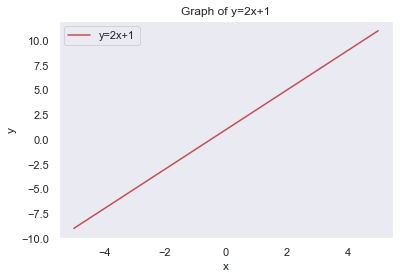

In the above example the slope on the line(m) is 2 and the intercept(c) is 1. Using this we can predict the value of the y for any value of x for the given equation.

In [1]:
# importing necessary lib to perform Linear Regression
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression 
sns.set()

In [2]:
# creating a dataset of 1 feature(s) of 100 different samples
X, y = make_regression(n_samples=1000, 
                       n_features=1,
                       n_informative=1,
                       noise=20,
                       random_state=100)
print(X[:10])   #printing the first 10 features                       

[[ 0.47969621]
 [-0.85467279]
 [-1.00338072]
 [-0.4237151 ]
 [ 1.32833309]
 [-0.2465973 ]
 [-0.41011201]
 [-0.57794627]
 [ 0.01632287]
 [-1.4290669 ]]


X is matrix of size m x n. Each Row(m) of the X is a different training example and column(n) represents the number of features in the training data. In our case the size of the training data will be (100, 1)

In [3]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


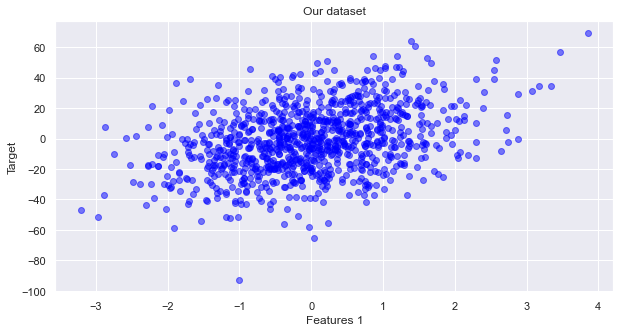

In [4]:
# Plotting the values on a graph 
def Figure(X,y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='Target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    ax.set_title('Our dataset')
    # display plot
    plt.show()

Figure(X,y)

# Bias Trick
The bias trick is used to reduce the calculations required. Doing a matrix multiplication and then adding a bias vector (left) is equivalent to adding a bias dimension with a constant of 1 to all input vectors and extending the weight matrix by 1 column – a bias column (right). Thus, if we preprocess our data by appending ones to all vectors we only have to learn a single matrix of weights instead of two matrices that hold the weights and the biases.

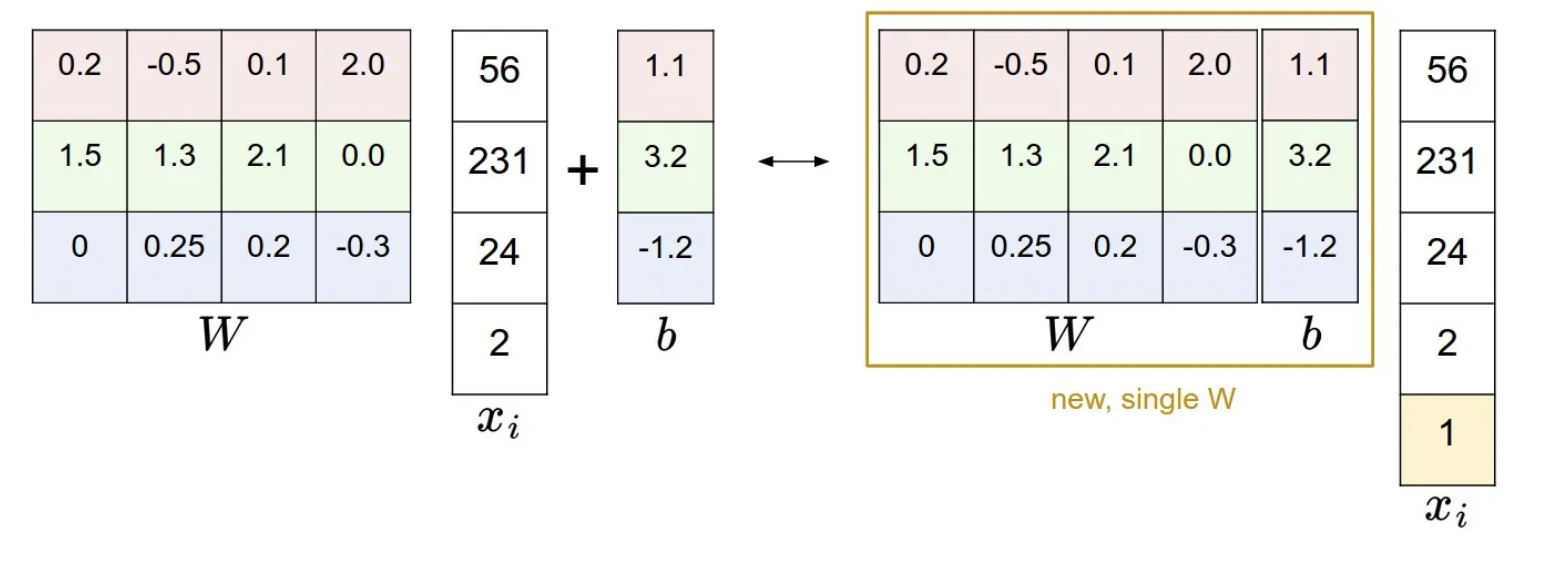

Ref: http://cs231n.github.io/linear-classify/

In [5]:
N = X.shape[0]
X_new = np.concatenate([np.ones((N, 1)), X], axis=1)
# Going forward this will be the matrix used for calculation

The Linear Regression Line for a single variable can be written as $y = \theta_0 + \theta_1 x_1$ and for problems with multiple variables the equation changes to $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_n x_n$ where $x_n$ is the number of features present in the model. To simplify the notation of the equation we can re write the equation in terms of the vector notation on the variables i.e vector notation $\vec \theta = [\theta_1, \theta_2, ...., \theta_n]$ 
$\vec x = [x_1, x_2, x_3, ...., x_n]$ which can be simplified to $h_{\theta}(x_i)$= $\theta^T \cdot \vec x+ b$= $\theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_i$.

$\theta^T x$ is used to calculate the hypothesis for a single training example when X is a vector. In practice there is a very rare chance that your training data will only consist of a single training example. In case of multiple training examples, the training vector X will be a matrix of size m x n where is the number of training examples and n is the number of features.

$\theta$ has to be a n x 1 vector then when you do Matrix-Vector Multiplication $X \theta$ you will obtain an m x 1 vector with all your h(x)'s training examples in your training set (X matrix). Matrix multiplication will create the vector h(x) row by row making the corresponding math and this will be equal to the h(x) definition at each training example.

## Ordinary Least Square



OLS is a meathod of finding the co-efficients of the linear equation. The equation of the OLS is $\beta = (X^TX)^{-1}X^TY$. This equation is also know as the Normal Equation. 

In [6]:
def Hypothesis(X, y):
    beta = inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(beta), beta

h_x, beta= Hypothesis(X_new, y)
print(beta)

[-1.03696421  7.75855753]


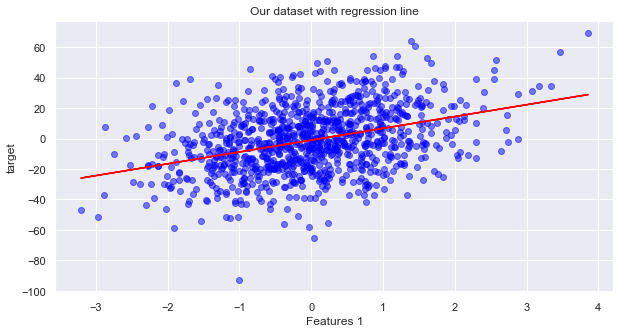

In [7]:
def Prediction(X, y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    # plot regression line
    ax.plot(X, h_x, color='red')
    ax.set_title('Our dataset with regression line')
    # display plot
    plt.show()

Prediction(X, y)

Cost function is an important parameter that determines how well a machine learning model performs for a given dataset. It calculates the difference between the expected value and predicted value and represents it as a single real number.

In [9]:
def CostFunction(X, y, beta):
    return  (X.dot(beta) -y).dot(X.dot(beta) -y) /(2*X.shape[0])

cost_func = CostFunction(X_new, y, beta)
print('Cost: %.02f ' % (cost_func))

Cost: 199.16 


In [10]:
def Mean_Square_Error(X, y, beta):
    return (X.dot(beta) - y).dot(X.dot(beta) - y)/ X.shape[0]

mse = Mean_Square_Error(X_new, y, beta)
print('MSE: %.02f RMSE: %.02f' % (mse, np.sqrt(mse)))

MSE: 398.32 RMSE: 19.96


In [11]:
def AbsoluteError(X, y, beta):
    return np.sum(abs(X.dot(beta) - y)) / X.shape[0]

mae = AbsoluteError(X_new, y, beta)
print('MAE: %.02f' % (mae))

MAE: 15.94


In [12]:
def Gradient(X, y, beta):
    return (y - X.dot(beta)).dot(X) /X.shape[0]


print(norm(Gradient(X_new, y, beta)))

1.3864892263388365e-15


In [13]:
def Linear(X, y, lr):
    N, D = X.shape
    theta = np.zeros(D)

    losses  = [Mean_Square_Error(X, y, beta)]
    betas = [theta.copy()]

    cost = CostFunction(X, y, theta)

    for i in range(N):
        y_pred = X.dot(theta)
        d_theta = Gradient(X, y, theta)
        theta += lr*d_theta
        
        loss = Mean_Square_Error(X, y, theta)
        
        losses.append(loss)
        betas.append(theta.copy())

        # Stopping Condition
        if abs(cost - loss) < lr:
            print("Converged.")
            break
        
        if (i % 10 == 0):
            print ("Iteration: %d - loss: %.4f "%(i, loss))
        
        cost  = loss
        
    return y_pred, np.array(losses), np.array(betas)
h_x , losses, betas = Linear(X_new, y, 1e-1)
print(betas[-1])

Iteration: 0 - loss: 451.5938 
Iteration: 10 - loss: 403.5411 
Iteration: 20 - loss: 398.8354 
Converged.
[-0.97131108  7.22153834]


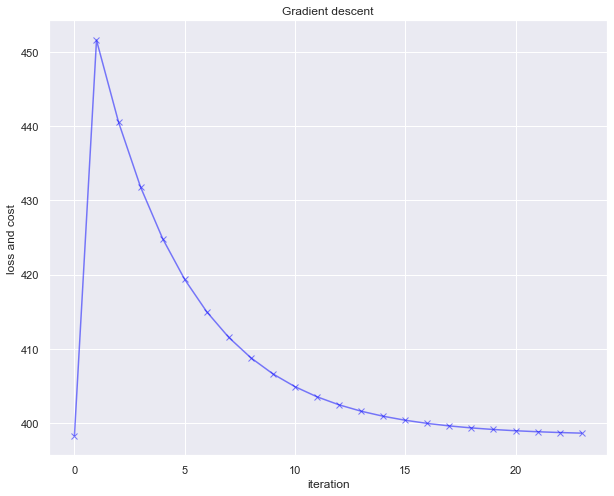

In [14]:
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss and cost')
# plot data on new axis
ax.plot(losses, color='blue', marker='x', alpha=0.5)
ax.set_title('Gradient descent')
# display plot
plt.show()

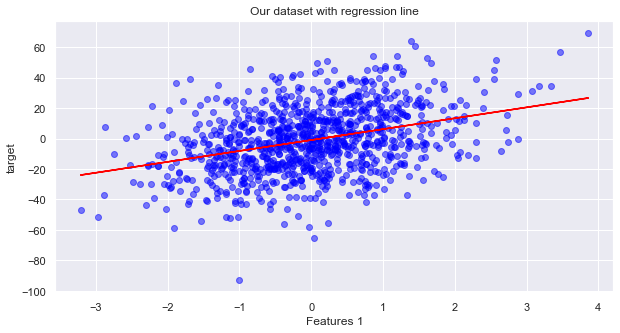

In [15]:
Prediction(X, y)

<ipython-input-16-e611cc37a61c>:17: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


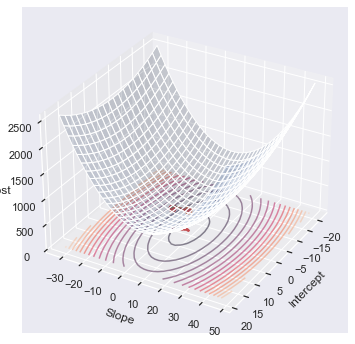

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# create meshgrid
ms = np.linspace(beta[0] - 20 , beta[0] + 20, 20)
bs = np.linspace(beta[1] - 40 , beta[1] + 40, 40)
M, B = np.meshgrid(ms, bs)
zs = np.array([Mean_Square_Error(X_new, y, theta) for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

# create 3D axis object
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel='Intercept',
                     ylabel='Slope', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

# plot start and end points
ax.plot([betas[0][0]], [betas[0][1]], [losses[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
ax.plot([betas[-1][0]], [betas[-1][1]], [losses[-1]] , markerfacecolor='r', marker='o', markersize=7);

# plot gradient descent curves
ax.plot(betas[:, 0], betas[:, 1], losses, markeredgecolor='r', marker='.', markersize=2);
ax.plot(betas[:, 0], betas[:, 1], 0, markeredgecolor='r', marker='.', markersize=2);

# set viewpoint
ax.view_init(elev=30, azim=30)

plt.show()